# Investigating 1D wave travelling through different mediums

## Konstantinos Doran SN: 22007700

### Introduction:
In this notebook, I will be investigating the 1D wave equation in 2D and 3D plots, with a varying value of r, where $r = c \Delta t/ \Delta x$:
$$ \frac {\partial^2 \theta}{\partial t^2} = c(x)^2\frac {\partial^2 \theta}{\partial x^2}$$
where $ \theta$ is the displacement appropriate to the wave, $c$ is the wave speed, $t$ is time and $x$ is position. However, c is dependent on position: 
$$ c(x) = c/n(x) $$
with $n(x)$ a refractive index that varies with position. For this situation, our value of n will remain constant between fixed positions but will consist of three regions of different n.
We discretise our equation to utilise $r$ and update our wave using the finite difference formula:

$$ \theta_{i,n+1} = 2(1-r^2)\theta_{i,n} - \theta_{i,n-1} + r^2(\theta_{i+1,n}+ \theta_{i-1,n}) $$
Where our i index is the position index and n index is our time index.

In [2]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Set up the wave equation update



In [3]:
#Copy wave update function from Session 6 exercises
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """Update wave equation using simple finite difference 
    approach.  Assumes periodic boundary conditions.
    Inputs: 
    theta_n   Wave at time t_n     = n*dt
    theta_nm1 Wave at time t_{n-1} = (n-1)*dt
    r         array of r values at position x (c(x) dt/dx)
    Output:
    theta at time t_{n+1} = (n+1)*dt"""
    # Fill in as appropriate
    theta_np1 = 2.0*(1-r*r)*theta_n - theta_nm1 + r*r*(np.roll(theta_n,1) + np.roll(theta_n,-1))
    return theta_np1

With how NumPy arrays function, I do not need to alter the function to operate with r being an array. It will function exactly the same as before.

### 2. Set up the wave, arrays and initial conditions

In [4]:
# Initialise constants
wavelength = 1                  # m
frequency = 1                   # Hz
wavevector = 2*np.pi/wavelength # 1/m
ang_freq = 2*np.pi*frequency    # 1/s
speed = wavelength*frequency    # m/s

# Define number of points and factor r
N = 40
mult =  6# Number of wavelengths
r = 0.3*np.ones(mult*N)
# Start and end points for change of r
st = 2*N
en = 3*N
r[st:en] = 0.15
# Initialise 
dx = wavelength/N
dt = r[0]*dx/speed
x = np.arange(0,mult*wavelength,dx)

### 3. Run the solver, storing the results, and plot

In [5]:
# Set initial wave conditions
t = 0
theta_0 = np.sin(wavevector*x - ang_freq*t)
t += dt
theta_1 = np.sin(wavevector*x - ang_freq*t)
# Restrict initial wave to one wavelength
theta_0[N:] = 0.0
theta_1[N+1:] = 0.0
# Run for at least 300 steps
iters = 600
# Store theta values
store_theta = np.zeros((iters,N*mult))
store_theta[0] = theta_0
store_theta[1] = theta_1
# Update wave after each step
for n in range(iters-2):
    # Adapt in-class code
    store_theta[n+2] = explicit_wave_eq_update(store_theta[n+1],store_theta[n],r)

#plt.imshow(store_theta, extent=(0,5*wavelength, 0, iters*dt),origin="lower")
#plt.colorbar()

### 4. 3D plot

Text(0.5, 0.92, 'Wave travelling through different mediums')

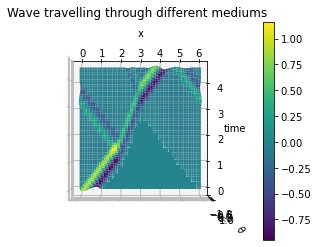

In [6]:
# Create array for time
t_arr = np.arange(0,iters*dt, dt)
# Create meshgrid for 3D plot
x2D, t2D = np.meshgrid(x,t_arr)
# Plot 3D surface of x, time, wave
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(x2D, t2D,store_theta, cmap='viridis')
fig.colorbar(surf)
ax.view_init(90,270)
# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('time')
ax.set_zlabel(r'$\theta$')
ax.set_title('Wave travelling through different mediums')


From this 3D plot, we can see how to wave propagates with time. As soon as the wave hits a region with a different refractive index, we observe multiple things, first the wave forms a transmitted wave that travels through the medium and also a reflected wave that rebounds away from the medium. The transmitted wave also changes speed, it slows down, so the angle it forms with respect to the time axis increases, as it moves slower, along with the amplitude of the wave decreasing. Once it reaches the next boundary, the opposite occurs with the transmitted wave now travelling faster, and a small reflected wave bouncing of the boundary again. Here we are observing the refraction of a wave travelling between different mediums.

### 6. 2D subplots

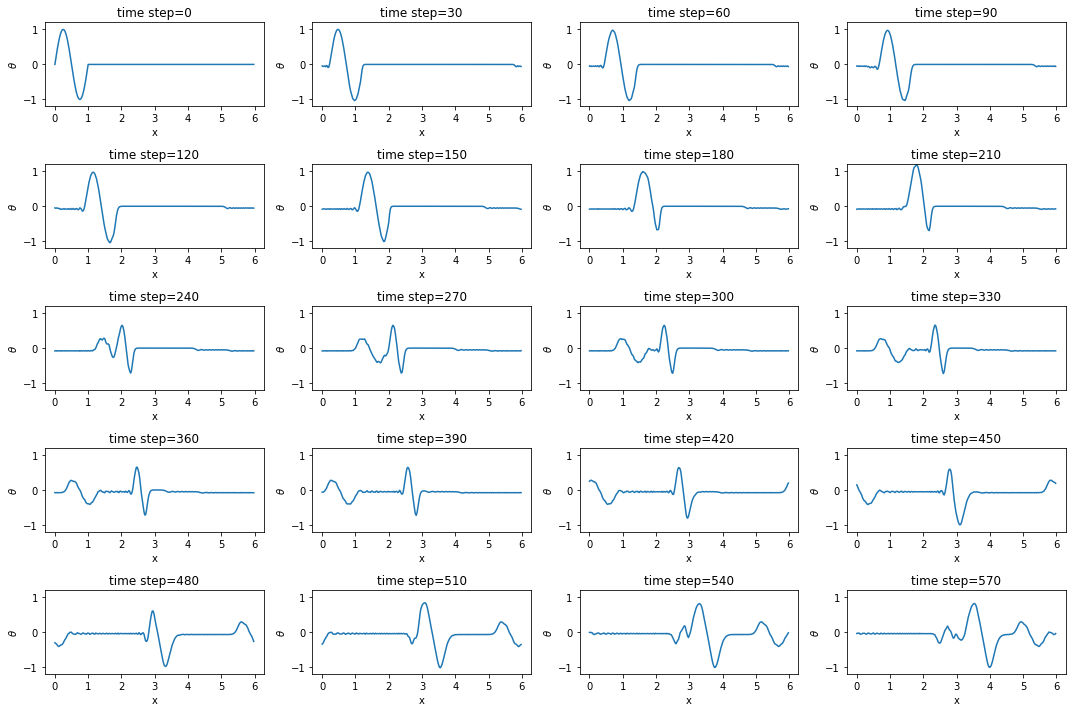

In [7]:
# Create figure with correct size
fig_parts = plt.figure(figsize=(15,10), tight_layout=True)
# Initialise number of plots
rows = 5
cols = 4
num  = rows*cols
step = int(iters/num)
# Plot wave at each time step
for i in range(num):
    ax = fig_parts.add_subplot(rows,cols,i+1)
    ax.plot(x,store_theta[step*i])
    # Add title and labels
    ax.set_title(f"time step={i*step}")
    ax.set_ylim((-1.2,1.2)) # This may be useful
    ax.set_xlabel('x')
    ax.set_ylabel(r'$\theta$')

### Conclusions:

Using a 3D plot was useful to demonstrate the wave travelling with time and allowed us to visualise the reflected and transmitted waves, which was not possible to see using 2D plots. 2D plots are advantageous if we want to specifically see what is happening to a wave at a specific point in time, for example what the wave looks like when it is corssing a boundary but it does not give us the ability to see its change in speed.